# Predicting House Prices by Simple Linear Regression

In this notebook, I will use data on house sales in King County, where Seattle is located, to **predict house prices in King County** by using simple (one feature) linear regression. Since this is an **observational study**, there cannot be causation between the explanatory and response variables. Instead, we can only study correlations between them.

In [1]:
# Import libraries to use
import numpy as np
import pandas as pd
import os


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load  Data


In [2]:
# Load the data
datapath = "dataset/"
filename = "kc_house_data.csv"
sales = pd.read_csv(datapath + filename)
display(sales.T)

,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20140825T000000,20150126T000000,20141014T000000,20150326T000000,20150219T000000,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,507250,429000,610685,1.0075e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The Data
- **id**: a notation for a house
- **date**: Date house was sold
- **price**: Price is a prediction target
- **bedrooms**: Number of bedrooms per house
- **bathrooms**: Number of bathrooms per House
- **sqft_living**: square footage of the house (sqft_living = sqft_above + sqft_basement)
- **sqft_lot**: square footage of the lot
- **floors**: Total number of floors (levels) in house
- **waterfront**: House which has a view to a waterfront (Yes: 1, No: 0)
- **view**: type of view
- **condition**: How good the condition is (Overall)
- **grade**: overall grade given to the housing unit, based on King County grading system
- **sqft_above**: square feet above ground
- **sqft_basement**: square feet in basement
- **yr_built**: Built year
- **yr_renovated**: Year when house was renovated
- **zipcode**: zip
- **lag**: Latitude coordinate
- **long**: Longitude coordinate
- **sqft_living15**: average sq.ft. of 15 nearest neighbors
- **sqft_lot15**: average lot size of 15 nearest neighbors

In [3]:
# Check data types
print(sales.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
# Check whether there are Null values in dataset
sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## 2. Exploring the data

In order to study the relations between numeric features of interest and price, we draw correlation heatmaps in the following.

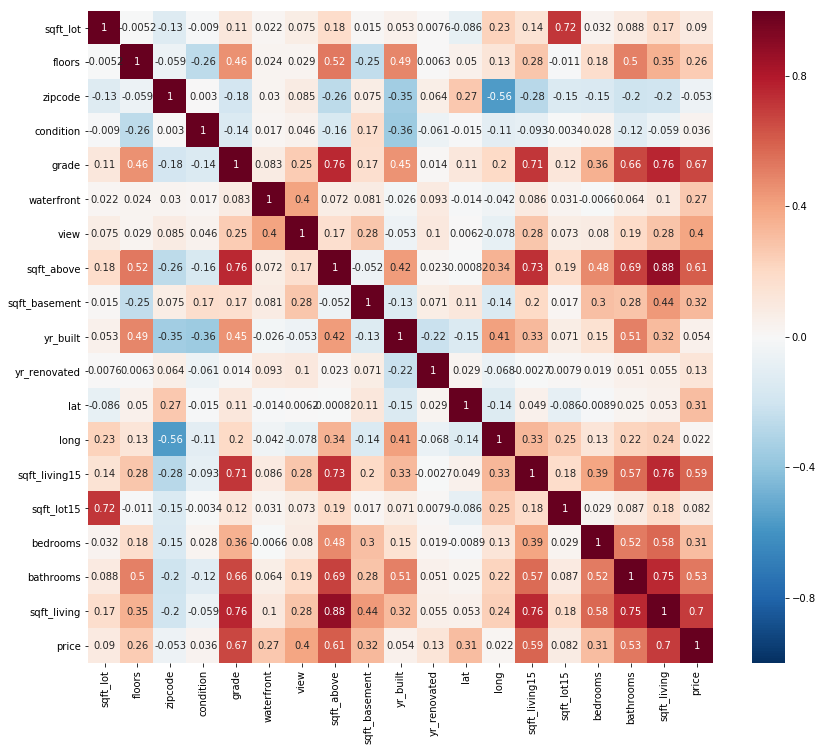

In [5]:
# Calculate correlations
# Features
features = ['sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
'bedrooms', 'bathrooms', 'sqft_living',
'price'
]

corr = sales[features].corr()

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, vmax = 1, cmap="RdBu_r")

# annot: If True, write the data value in each cell. 
#        If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.
# linewidths: Width of the lines that will divide each cell.
# vmin, vmax: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments
# cmap: The mapping from data values to color space. https://seaborn.pydata.org/tutorial/color_palettes.html

The value in each cell is the **Pearson correlation coefficient** ($R_{xy}$), defined as

$$ R_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}},$$

where $n$ is the sample size, $x_i$, $y_i$ are the indivisual sample points indexed with $i$, $\bar{x}$ and $\bar{y}$ are mean of $x$ and $y$, respectively.

- **Positive** correlation means that as one feature increases, the other increases. E.g. price vs. sqft_living
- **Negative** correlation means that as one feature increases, the other decreases. E.g. yr_built vs. condition
- Correlations near -1 or 1 indicate a **strong relationship**.
- Those closer to 0 indicates a **weak relationship**.
- 0 indicates **no relationship**.

From above heatmap, we can see that **price has the strongest positive relationship with sqft_living**. That is, **the larger the size of house, the higher the sale price.**

## Q1: Do the size of house (sqft_living) and sale price (price) have linear relationship?

We want to check whether 

$$ \hat{\text{price}} = b + w \times \text{sqft_living}$$

In [6]:
# Split the data into training and test sets with ration 80% : 20%
np.random.seed(0)
msk = np.random.rand(len(sales)) < 0.8

sales_train = sales[msk]
sales_test = sales[~msk]

In [7]:
print('Training set has {} training samples, \
test set has {} test samples'.format(sales_train['id'].count(), sales_test['id'].count()))

Training set has 17257 training samples, test set has 4356 test samples


In order to see whether the size of house and sale price have linear relationship, let's plot a scatter plot for `price` vs. `sqft_living` below.

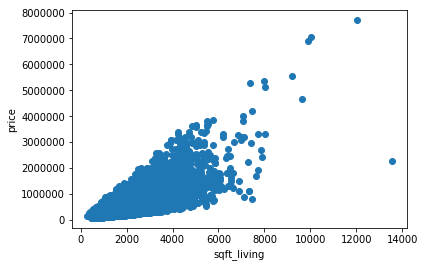

In [8]:
# Plot price vs sqft_living
plt.scatter(sales_train['sqft_living'],sales_train['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

From above figure, we can see that the `price` has linear dependence with `sqft_living` so we will apply **simple linear regression model** by considering one feature, `sqft_living`. Also note that there ia a high leverage point with sqft_living around 14000. We will examine whether this point is an influential point later. That is, this point will affect the resulting linear fit strongly. We will discuss it further in the following.

## 3. Computing Linear Regression Parameters by Closed Form

The cost function of linear regression is defined as

$$ J = \frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))^2 $$

which is **mean squared error** (MSE), so the gradient of $J$ leads to

$$ \nabla_{\bf w} J = 
\begin{bmatrix}
-\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))\\
-\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))x_i
\end{bmatrix} . \tag{1}$$

To minimize the cost function $J$, we require

$$\nabla_{\bf w} J = 0 $$

Hence, the first element in above matrix (1) leads to 

$$ -\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i)) =0 \Rightarrow -\bar{y} + b + w \bar{x} = 0  $$ 
$$\boxed{ b = \bar{y} - w \bar{x} } \tag{2}$$

where $\bar{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i$, the average of $x$ and, similarly, $\bar{y} \equiv \frac{1}{N}\sum_{i=1}^N y_i$, the average of $y$.

By using (2), we can eliminate $b$ in the second equation in (1). The second element in above matrix results in

$$ -\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))x_i =0 \Rightarrow -\bar{xy} + b \bar{x} + w \bar{x^2} = 0 $$
$$ \boxed{ w = \frac{\bar{x}\bar{y} - \bar{xy}}{\bar{x}^2 - \bar{x^2}} } \tag{3}$$

where $\bar{xy} \equiv \frac{1}{N} \sum_{i=1}^N x_i y_i$ and $\bar{x^2} \equiv \frac{1}{N} \sum_{i=1}^N x_i^2$. 

Therefore, we only need to calculate $\bar{y}$, $\bar{x}$, $\bar{x^2}$, and $\bar{xy}$.

Note that ($\bar{x}, \bar{y}$) is always a solution to the simple linear regression model. That is, **($\bar{x}, \bar{y}$) is always located on the linear line we obtained.** We can prove it easily in the following:

$$ \hat{y} = b + w x = (\bar{y} - w \bar{x}) + w x $$
Here, $\hat{y}$ is the predicted output from the model, and we have used the relation we obtained in (2), $b = \bar{y} - w \bar{x}$. Hence, when $x = \bar{x}$, we can get $\hat{y} = \bar{y}$.



In [9]:
class ExactLinearRegression:
    """
    Use closed form to fit linear regression model
    """
    
       
    def simple_linear_regression(self, input_feature, output):
        """
        Calculate parameters b and w of linear equation y= b + w*x by closed form.
    
        parameters:
        ----------
        input_feature: input feature for x in form of dataframe
        output: output for y in form of dataframe
    
        return:
        ------
        parameters: dictionary {'W':w, 'b':b}
            b : interception of linear equation
            w : slope of linear equation
        
        Notes
        -----
        In this simple linear regression model, we only consider single input feature.
        """
        # Convert dataframe into numpy array
        input_feature = np.c_[input_feature]
        output = np.c_[output]
        
        # Calculate bar x, bar y, bar x*y, and bar x^2
        mean_x = np.mean(input_feature)
        mean_y = np.mean(output)
        mean_xy = np.mean(input_feature*output)
        mean_xx = np.mean(input_feature*input_feature)

        # Get slope w and intercept b
        w = (mean_x * mean_y - mean_xy)/(mean_x*mean_x - mean_xx)
        b = mean_y - w*mean_x
        
        parameters = {"W": w, "b": b}
        return parameters
    
    
    def predict(self, X, parameters):
        """
        Predicting Y Values by parameters obtained from model fitting, Y = X W + b
        
        Parameters
        ----------
        X: numpy array, input feature
        parameters: dictionary, parameters obtained from model fitting
        
        Returns
        -------
        predictions: predict output values
        """
    
        W = parameters["W"]
        b = parameters["b"]
      

        # Single feature
        predictions = X*W + b
    
        return predictions
    
    def inverse_regression_predictions(self, Y, parameters):
        """
        Predicting X Values by parameters obtained from model fitting, Y = X W + b
        
        Parameters
        ----------
        Y: numpy array, output 
        parameters: dictionary, paramters obtained from model fitting
        
        Returns
        -------
        inverse_predictions: predict X values with given Y
        """
        W = parameters["W"]
        b = parameters["b"]
        
        # Single feature
        inverse_predictions = (Y-b)/W
            
        
        return inverse_predictions
            
       
    def plot(self, X, Y, predictions, parameters, xlabel=None, ylabel=None):
        """
        Plot Y vs. X and fitting line
        
        Parameters
        ----------
        X: float
           input feature
        Y: float
           output values
        predictions: predicting values from fitting model
        parameters: parameters obtained from model fitting
        xlabel: optional, xlabel
        ylabel: optional, ylabel
        """
        W = parameters["W"]
        b = parameters["b"]
        y_eq = np.max(Y)*0.9 + 1.0  # y coordinate of equation
        x_eq = np.min(X)      # x coordinate of equation
        # Plot 
        plt.plot(X, Y, '.', X, predictions, '-')
        plt.text(x_eq, y_eq, "$y = %1.3f * x + (%1.3e ) $" % (W,b), fontsize=14)
        if (xlabel is not None) and (ylabel is not None): 
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
        plt.show()
        
    def scores(self, Y, predictions):
        """
        Evaluate model by Residual Sum of Squares (RSS)
        
        Parameters
        ----------
        Y: output values
        predictions: predicting values from fitting model
        
        Returns:
        --------
        RSS: Residual Sum of Squares
        
        """
        # Convert dataframe into numpy array
        true_y = np.c_[Y]
        pred_y = np.c_[predictions]

        RSS = np.sum( (true_y - pred_y)**2 )
        
        return RSS

In [10]:
# Calculate linear regression parameters by closed form in (2) and (3)

# Create an object
model_exact = ExactLinearRegression()

In [11]:
# fit data to get parameters
parameters_exact = model_exact.simple_linear_regression(sales_train['sqft_living'], sales_train['price'])

In [12]:
# By using fitting parameters we obtained, predict house price with given sqft_living
predictions_exact = model_exact.predict(sales_train['sqft_living'], parameters_exact)

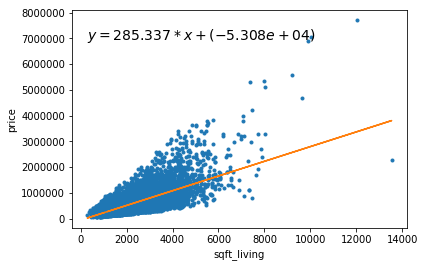

In [13]:
# Plot 
model_exact.plot(sales_train['sqft_living'], sales_train['price'], predictions_exact, parameters_exact, xlabel='sqft_living', ylabel='price')

For each square footage increase in size of house, we would expect the price of house to be higher on average by 285.337 dolars.

### Check whether high leverage point is an influential point

If the high leverage point is an influential point, we'd better to remove this outlier to construct our model so let's check it.

In [14]:
# Find the high leverage point
sales_train[sales_train['sqft_living']>13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [15]:
# Remove the high leverage point
sales_train_new = sales_train[sales_train['sqft_living']<13000]

In [16]:
# fit data to get parameters
parameters_exact_new = model_exact.simple_linear_regression(sales_train_new['sqft_living'], sales_train_new['price'])

In [17]:
# By using fitting parameters we obtained, predict house price with given sqft_living
predictions_exact_new = model_exact.predict(sales_train_new['sqft_living'], parameters_exact_new)

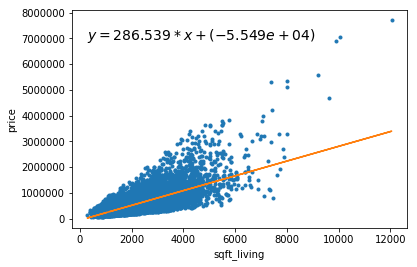

In [18]:
# Plot 
model_exact.plot(sales_train_new['sqft_living'], sales_train_new['price'], \
                 predictions_exact_new, parameters_exact_new, xlabel='sqft_living', ylabel='price')

It seems that removing the high leverage point doesn't change the slope a lot. The change of the slope is 1.2. It may not affect the predicted house price a lot when `sqft_living` is small. But when `sqft_living` is large, it will have huge difference. Let's consider the following case.

### Predict House Price with Given Squarefeet

Now we can calculate a prediction given the slope ($w$) and intercept ($b$). We find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

In [19]:
# Predict house pricing with given 2650 squarefeet by using model without removing the outlier
model_exact.predict(2650.0, parameters_exact)

703064.7460964206

In [20]:
# Predict house pricing with given 2650 squarefeet by using model with removing the outlier
model_exact.predict(2650.0, parameters_exact_new)

703836.1052763829

In this case, the difference of predicted house price for a house with 2650 squarefeet is about 772 dollars.

Now let's consider the house with larger squarefeet, say 6000 squarefeet. 

In [21]:
# Predict house pricing with given 6000 squarefeet by using model without removing the outlier
model_exact.predict(6000.0, parameters_exact)

1658942.166751741

In [22]:
# Predict house pricing with given 6000 squarefeet by using model with removing the outlier
model_exact.predict(6000.0, parameters_exact_new)

1663742.1474173204

Then we can see that the difference of house price is about 4800 dolars! 

### Predict the Squarefeet with Given Price

What if we want to predict the squarefoot given the price? Since we have an equation $y = b + w*x$, we can solve the function for $x$ such that if we have the intercept ($b$) and the slope ($w$) and the price ($y$), we can solve for the estimated squarefeet ($x$).

$$ x = (y-b)/w .$$

Now we can compute the squarefeet with given the price from our simple linear regression model so let's see how big we might expect a house that costs $800,000 to be

In [23]:
my_house_price = 800000
estimated_squarefeet = model_exact.inverse_regression_predictions(my_house_price, parameters_exact_new)
print("The estimated squarefeet for a house worth ${} is {}.".format( my_house_price, estimated_squarefeet) )

The estimated squarefeet for a house worth $800000 is 2985.6047708644574.


### Hypothesis testing for the slope

Is the explanatory variable `sqft_living` a significant predictor of the response variable, `price`?

Set up hypothesis:

$H_0: \beta_1 = 0$. The explanatory variable is not a significant predictor of the response variable. That is, there's no relationship between them.

$H_A: \beta_1 \neq 0$. The explanatory variable is a significant predictor of the response variable.

Here, we use ordinary least squares (OLS), or simple linear regression, in `statsmodels` library to check the results obtained by using my own codes and calculate p-value for hypothesis testing for the slope. Note that in `statsmodels`, the OLS use the closed form as well.

In [24]:
import statsmodels.formula.api as sm

In [25]:
# It's similar to lm in R
result = sm.ols(formula="price ~ sqft_living", data=sales_train_new).fit()

# Get parameters including slope and intercept
p = result.params
print("The slope and intercept are {0} and {1}.".format(p.sqft_living, p.Intercept))

The slope and intercept are 286.5391170569965 and -55492.55492465853.


The parameters are consistent with ones by using my own codes.

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.705e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:16:39   Log-Likelihood:            -2.3997e+05
No. Observations:               17256   AIC:                         4.799e+05
Df Residuals:                   17254   BIC:                         4.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.549e+04   4994.899    -11.110      

From above summary, we can see that p-value is less than significance level $\alpha = 0.05$ so we reject the null hypothesis $H_0$, and accept alternative hypothesis $H_A$. Hence, **the explanatory variable `sqft_living` is a significant predictor of the response variable `price`.**

### Model Diagnostics

#### 1 linearity: 

We have checked if the relationship between house price and squarefeet is linear using a scatter plot already.

#### 2 constant variability: 

We need to check for **constant variability** by plotting residuals plot.

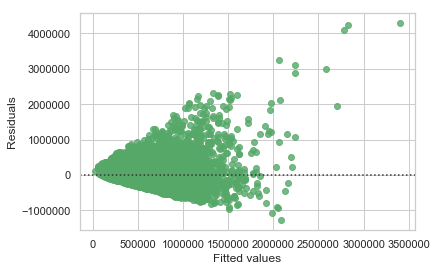

In [27]:
# Plot the residuals after fitting a linear model
sns.set(style="whitegrid")
sns.residplot(x=result.fittedvalues, y=result.resid, color="g")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

From above figure, it's clear that constant variability is not satisfied. **Residuals do not have homoscedasticity, or not constant variance**. It implies that the results from the model are not reliable! Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).

#### 3 nearly normal residuals: 

In ordinary least squares (OLS) regression, we assume the residuals are nearly normal. Let's check the condition by plotting quantile-quantile plot (q-q plot), or normal probability plot, and distribution of residuals.

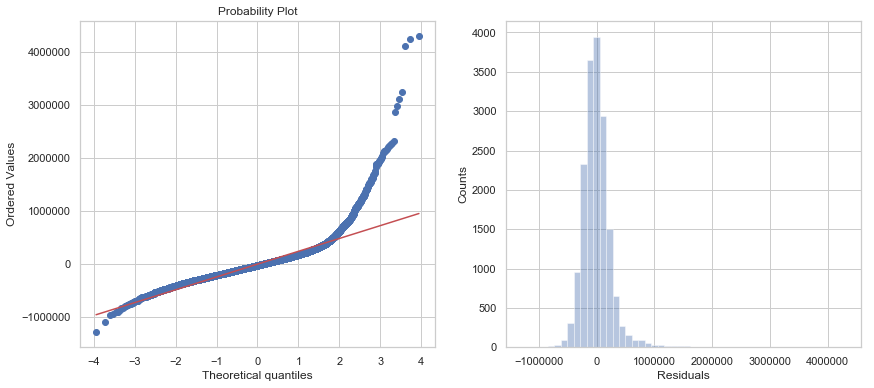

In [28]:
import pylab 
import scipy.stats as stats
from scipy.stats import norm

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
stats.probplot(result.resid, dist="norm", plot=pylab)


plt.subplot(1, 2, 2)
sns.distplot(result.resid,  kde=False)
plt.xlabel("Residuals")
plt.ylabel("Counts")
plt.show()

The largest values are larger than what would be expected in normal distribution. **The residuals are right-skewed. Hence, the normal distribution of residuals condition is not met.** 

### How to fix it? 

Let's try log transformation of price in the following.

In [29]:
# Create log_sqft_living by log transformation
sales_train_new['log_price'] = sales_train_new['price'].apply(np.log)

# Also we rescale the sqft_living by diving 1000
sales_train_new['sqft_living_scale'] = sales_train_new['sqft_living']/1000

c:\users\fsh\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\fsh\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### 1 linearity: 

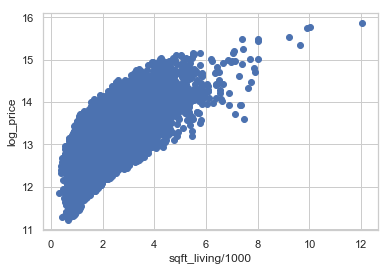

In [30]:
# Plot log_price vs sqft_living
plt.scatter(sales_train_new['sqft_living_scale'],sales_train_new['log_price'])
plt.xlabel('sqft_living/1000')
plt.ylabel('log_price')
plt.show()

From above scatter plot, the points are close to each other after transformation. Also, it seems `log_price` has linear reationship with `sqft_living`. Hence, **the linearity is satisfied**.

### Hypothesis testing for the slope

Is the explanatory variable `sqft_living` a significant predictor of the response variable, `log_price`? That is, is the following model correct?

$$ \hat{\text{log_price}} = \beta_0 + \beta_1 \text{sqft_living}/1000.$$

Set up hypothesis:

$H_0: \beta_1 = 0$. The explanatory variable is not a significant predictor of the response variable. That is, there's no relationship between them.

$H_A: \beta_1 \neq 0$. The explanatory variable is a significant predictor of the response variable.

Here, we use ordinary least squares (OLS), or simple linear regression, in `statsmodels` library again to calculate p-value for hypothesis testing for the slope. 

In [31]:
# It's similar to lm in R
result_trans = sm.ols(formula="log_price ~ sqft_living_scale", data=sales_train_new).fit()

# Get parameters including slope and intercept
p_new = result_trans.params
print("The slope and intercept are {0} and {1}.".format(p_new.sqft_living_scale, p_new.Intercept))

The slope and intercept are 0.4034501884654252 and 12.20726870347459.


In [32]:
print(result_trans.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:16:41   Log-Likelihood:                -7739.4
No. Observations:               17256   AIC:                         1.548e+04
Df Residuals:                   17254   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.2073      0.00

From above summary, we can see that p-value is less than significance level $\alpha = 0.05$ so we reject the null hypothesis $H_0$, and accept alternative hypothesis $H_A$. Hence, **the explanatory variable `sqft_living` is a significant predictor of the response variable `log_price`.** 

The scatter plot with fitted line is given by the following:

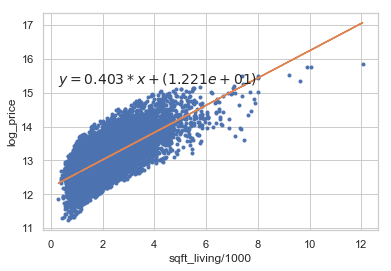

In [33]:
# Plot scatter plot with fitted line
parameters = {"W": p_new.sqft_living_scale, "b": p_new.Intercept}
model_exact.plot(sales_train_new['sqft_living_scale'], sales_train_new['log_price'], result_trans.fittedvalues, \
                 parameters, xlabel='sqft_living/1000', ylabel='log_price')

#### 2 constant variability: 

We need to check for **constant variability** by plotting residuals plot.

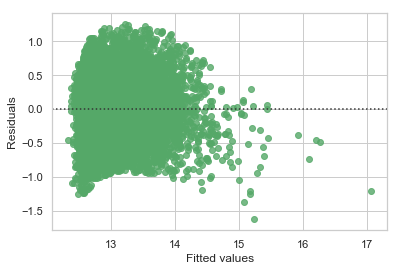

In [34]:
# Plot the residuals after fitting a linear model
sns.set(style="whitegrid")
sns.residplot(x=result_trans.fittedvalues, y=result_trans.resid, color="g")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

From above figure, it's clear that **constant variability is satisfied now**! 

#### 3 nearly normal residuals: 

In ordinary least squares (OLS) regression, we assume the residuals are nearly normal. Let's check the condition by plotting normal probability plot, and distribution of residuals.

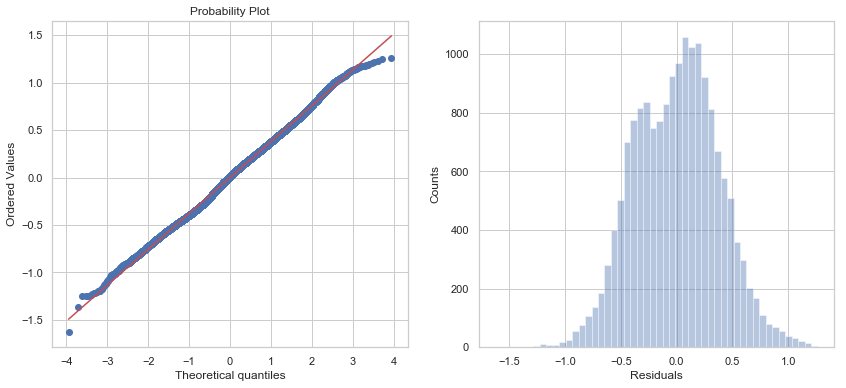

In [35]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
stats.probplot(result_trans.resid, dist="norm", plot=pylab)


plt.subplot(1, 2, 2)
sns.distplot(result_trans.resid,  kde=False)
plt.xlabel("Residuals")
plt.ylabel("Counts")
plt.show()

**The residuals are nearly normal now! Hence, the normal distribution of residuals condition is met.** 

To conclude, the house sale price does NOT have linear relationship with size of house. Instead, **the house sale price has non-linear relationship with size of house**!

$$ \ln ( \text{price} )= 12.207 + 0.403 \times \frac{\text{sqft_living}}{1000} \Rightarrow \text{price} = \exp \left[12.207 + 0.403 \times \frac{\text{sqft_living}}{1000} \right].$$

## 4. Evaluate Model by Residual Sum of Squares

Now we use the reliable model we obtained in the end to make predictions so let's evaluate our model by using **Residual Sum of Squares (RSS)**. Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

$$ RSS \equiv \sum_{i=1}^N (y_i - \hat{y}_i)^2 \tag{4}$$

where $\hat{y}_i$ is predicted price for sample $i$. In our model, $\hat{y}_i = \exp \left[ \text{predicted value from model} (\ln \text{price}) \right]$.

**Reference**
[Residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)


### 1. RSS on TRAINING data

In [36]:
# Evaluate model by RSS
RSS_train = model_exact.scores(sales_train_new['price'], np.exp(result_trans.fittedvalues))
print("RSS = %1.3e" % RSS_train)

RSS = 1.547e+15


RSS for the simple linear regression using squarefeet to predict prices on **TRAINING data** is $1.547 \times 10^{15}$.

### 2. RSS on Testing data

Now we have trained model for predicting the price of a house. Calculate the RSS on the TEST data (recall that this data wasn't involved in learning the model).

In [37]:
# Compute RSS when using bedrooms on TEST data:

# Prepare test data for model prediction
# Create log_sqft_living by log transformation
sales_test['log_price'] = sales_test['price'].apply(np.log)

# Also we rescale the sqft_living by diving 1000
sales_test['sqft_living_scale'] = sales_test['sqft_living']/1000


# By using fitting parameters we obtained, predict house price with given bedrooms
predictions_test = result_trans.predict(sales_test['sqft_living_scale'])

# Evaluate model by RSS
RSS_test = model_exact.scores(sales_test['price'], np.exp(predictions_test))
print("RSS when using bedrooms on TEST data = %1.3e" % RSS_test)

RSS when using bedrooms on TEST data = 2.704e+14


c:\users\fsh\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\fsh\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RSS for the simple linear regression using squarefeet to predict prices on **TESTING data** is $2.704 \times 10^{14}$.

## Recap:

- We have found that the relation between house price and size of house is non-linear,
  $$ \text{price} = \exp \left[12.207 + 0.403 \times \frac{\text{sqft_living}}{1000} \right] $$

- In order to improve the prediction accuracy, we can try multiple linear regression next. To do so, we can use forward selection to find out the parsimonious model, which is the simplest model with the highest predictive power.